In [1]:
using Posets
using Plots
import Distributions: MvNormal

# Calculo de metodos

In [2]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end

metametodo (generic function with 1 method)

In [12]:
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [13]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)

#43 (generic function with 1 method)

In [14]:
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

# 1ra comparativa: Poset de metodo y RdP

## Datos

In [15]:
ejemplo = [generapuntuaciones_gaussian(20,7,2)[2] for _ in 1:10^3];

In [16]:
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo];

anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo];

anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [17]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true)[2] for _ in 1:10^3];

In [18]:
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];
anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];
anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

In [19]:
ejemplo_pocoruido = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=nmat)[2] for _ in 1:10^3];

In [20]:
anima_corte0p95_pocoruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_pocoruido];
anima_corte0p90_pocoruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_pocoruido];
anima_corte0p80_pocoruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_pocoruido];

## Presentacion resultados

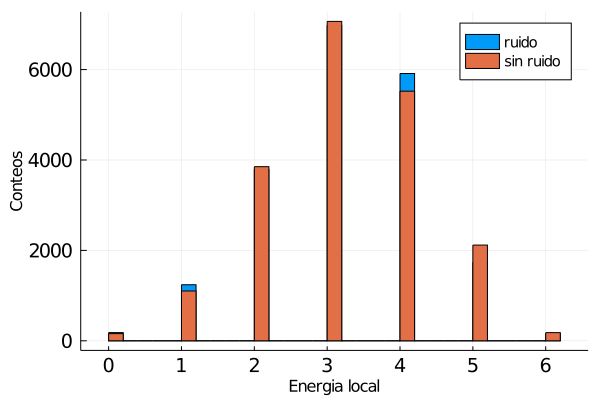

In [21]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95...)],
xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
labels = ["ruido" "sin ruido"],legendfontsize=10)

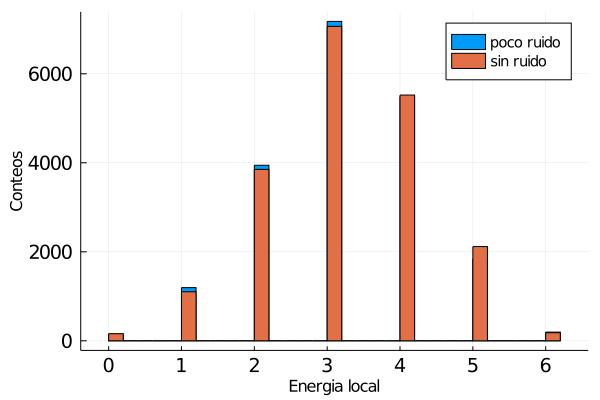

In [22]:
histogram([vcat(anima_corte0p95_pocoruido...), vcat(anima_corte0p95...)],
xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
labels = ["poco ruido" "sin ruido"],legendfontsize=10)

## Conclusiones

No hay mucha diferencia entre los casos con y sin usar ruido

# 2da comparativa: PdP y Posets de metodos

## Datos

In [23]:
ejemplo = [generapuntuaciones_gaussian(20,7,2) for _ in 1:10^3];

In [24]:
anima_corte0p95 = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p90 = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p80 = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo];

In [25]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true) for _ in 1:10^3];

In [26]:
anima_corte0p95_ruido = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p90_ruido = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p80_ruido = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo_ruido];

In [27]:
ejemplo_pocoruido = [generapuntuaciones_gaussian(20,7,2;ruido=true,matruido=nmat) for _ in 1:10^3];

In [28]:
anima_corte0p95_pocoruido = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo_pocoruido];

anima_corte0p90_pocoruido = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo_pocoruido];

anima_corte0p80_pocoruido = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo_pocoruido];

## Presentacion resultados

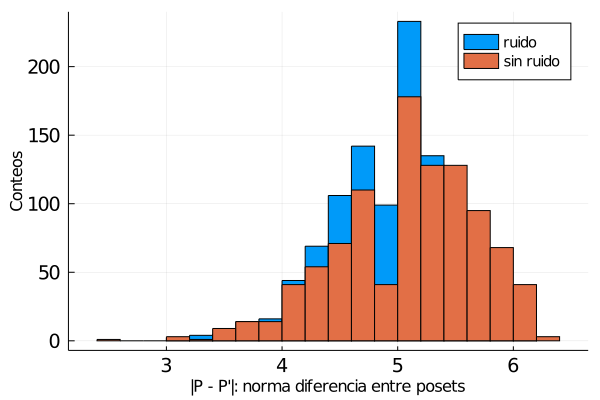

In [29]:
histogram([vcat(anima_corte0p90_ruido...), vcat(anima_corte0p90...)],
xtickfontsize=13, ytickfontsize=13,
xlabel="|P - P'|: norma diferencia entre posets", ylabel="Conteos",
labels = ["ruido" "sin ruido"],legendfontsize=10)

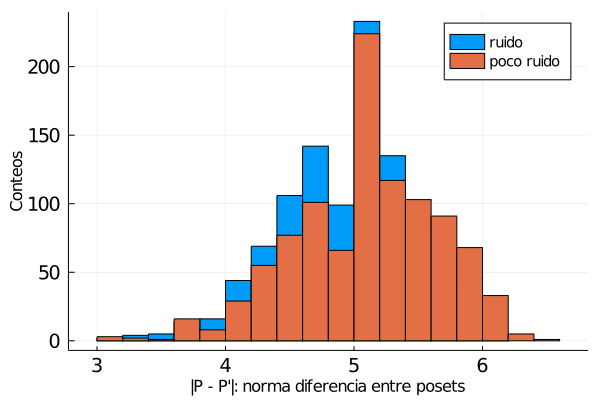

In [30]:
histogram([vcat(anima_corte0p90_ruido...), vcat(anima_corte0p90_pocoruido...)],
xtickfontsize=13, ytickfontsize=13,
xlabel="|P - P'|: norma diferencia entre posets", ylabel="Conteos",
labels = ["ruido" "poco ruido"],legendfontsize=10)

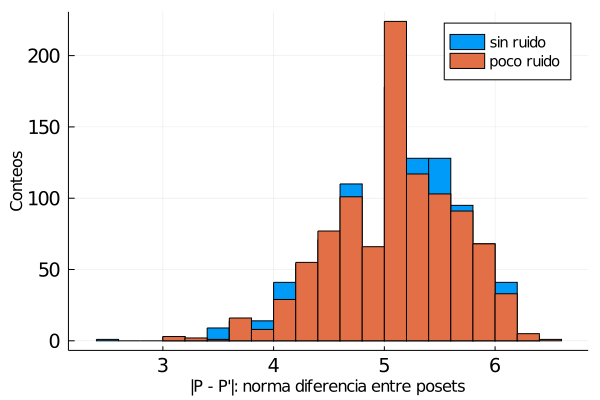

In [31]:
histogram([vcat(anima_corte0p90...), vcat(anima_corte0p90_pocoruido...)],
xtickfontsize=13, ytickfontsize=13,
xlabel="|P - P'|: norma diferencia entre posets", ylabel="Conteos",
labels = ["sin ruido" "poco ruido"],legendfontsize=10)

## Conclusiones

No hay mucha diferencia entre las diferencias, con y sin usar ruido

# Ruido

In [23]:
dim=2
numeronodos=10

puntosnodos = rand(MvNormal([0 for _ in 1:dim],1),numeronodos)

2×10 Array{Float64,2}:
 -0.929675  0.101444   0.175138   0.273078  …  0.948362   1.30811  -0.335324
 -0.326047  0.747783  -0.103921  -1.0582       0.387153  -1.56731  -0.543915

In [24]:
noisy = [matrizposet(puntosnodos, comparativaruidosa) for _ in 1:10^2]

100-element Array{Array{Int64,2},1}:
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 1; 0 1 … 0 0]
 [0 1 … 0 1; 1 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 1 0 … 0 0; … ; 0 1 … 0 0; 1 1 … 0 0]
 [0 0 … 1 1; 0 0 … 0 1; … ; 0 1 … 0 0; 1 0 … 0 0]
 [0 0 … 1 1; 1 0 … 0 0; … ; 1 0 … 0 0; 1 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 1 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 1 … 0 1; 1 0 … 1 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 1 0 … 1 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 ⋮
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 1 0 … 0 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 1 0]
 [0 1 … 1 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 1 … 0 

In [25]:
matdis = zeros(Float64,100,100);

In [26]:
for (i,x) in enumerate(noisy), (j,y) in enumerate(noisy)
    matdis[i,j] = norm(x-y)
end

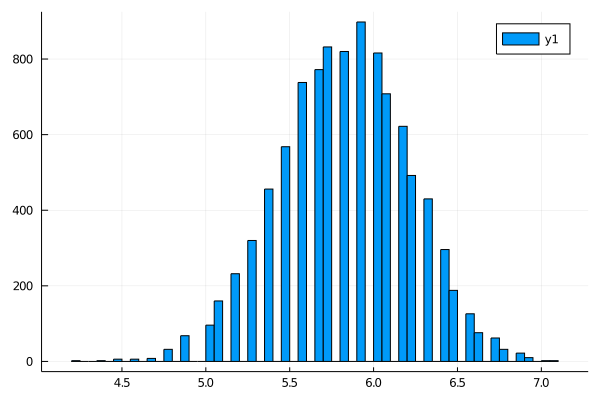

In [27]:
filter(x -> x>0, [matdis[i] for i in 1:100^2]) |> histogram

# Correlacion

Experimento. Usar una matriz de covarianza en que
los elementos esten claramente _correlacionados_
y ver que sucede con la estadistica.

## Digresion

In [3]:
import Distributions: MvNormal

In [18]:
matcesgada = [1. .9; .9 1.]

sampleo = rand(MvNormal([0 for _ in 1:2],matcesgada),10^3)

puntos = [(sampleo[:,i][1],sampleo[:,i][2]) for i in 1:10^3];

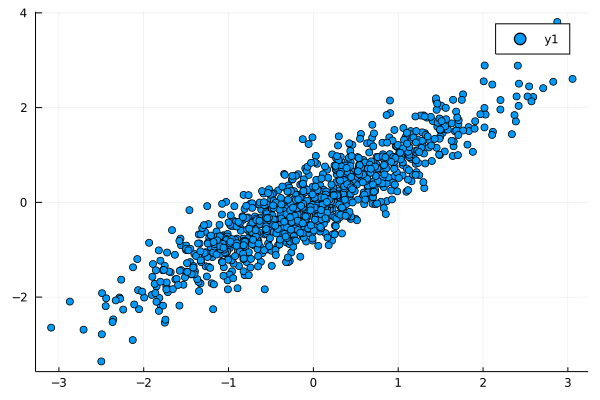

In [19]:
scatter(puntos)

## Regresando de la Digresion

In [34]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true,covmat=1)[2] for _ in 1:10^3];

In [35]:
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];

anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];

anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

In [36]:
ejemplo_ruido_cesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,covmat=matcesgada)[2] for _ in 1:10^3];

In [37]:
anima_corte0p95_ruido_cesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido_cesgo];

anima_corte0p90_ruido_cesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido_cesgo];

anima_corte0p80_ruido_cesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido_cesgo];

## Presentacion resultados

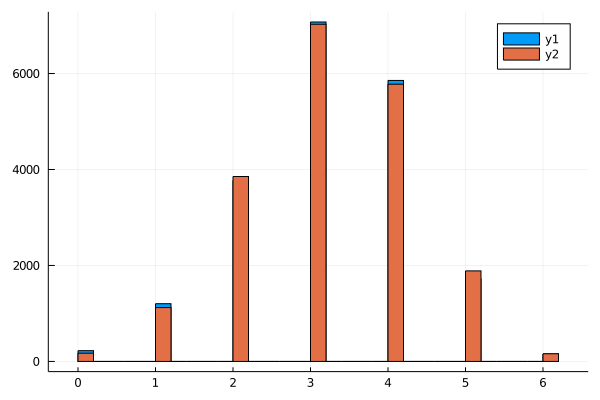

In [38]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95_ruido_cesgo...)])

## Datos

In [53]:
ejemplo = [generapuntuaciones_gaussian(20,7,2) for _ in 1:10^3];

In [54]:
anima_corte0p95 = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p90 = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p80 = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo];

In [61]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true,covmat=1) for _ in 1:10^3];

In [62]:
anima_corte0p95_ruido = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p90_ruido = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p80_ruido = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo_ruido];

In [55]:
ejemplo_ruido_cesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,covmat=matcesgada) for _ in 1:10^3];

In [56]:
anima_corte0p95_ruido_cesgo = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo_ruido_cesgo];

anima_corte0p90_ruido_cesgo = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo_ruido_cesgo];

anima_corte0p80_ruido_cesgo = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo_ruido_cesgo];

## Presentacion resultados

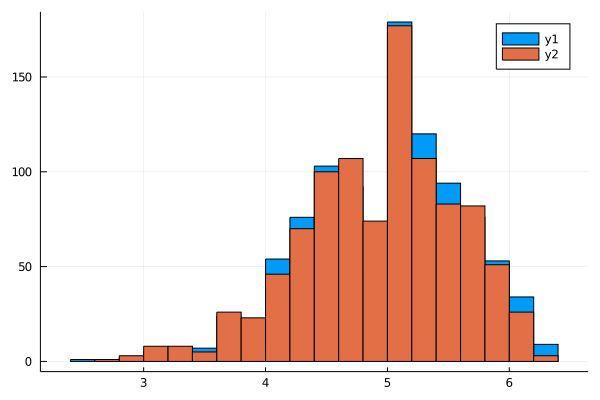

In [60]:
histogram([vcat(anima_corte0p95...), vcat(anima_corte0p95_ruido_cesgo...)])

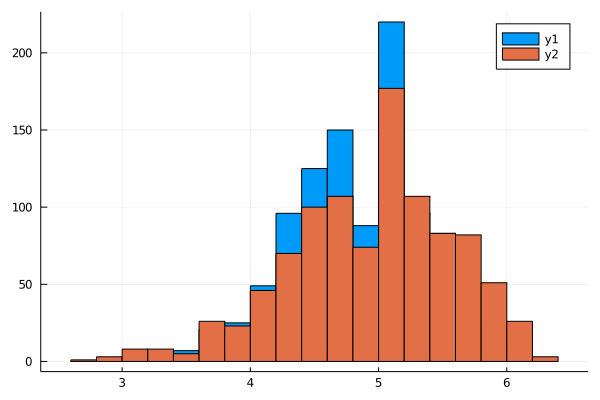

In [63]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95_ruido_cesgo...)])